<a href="https://colab.research.google.com/github/abhishek-shishodia/Exploratory-data-analysis-EDA-/blob/main/Telecom_Churn_Analysis_Using_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Telecom Churn Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Member** - Abhishek Shishodia


# **Project Summary -**

**OVERVIEW OF BUSINESS PROBLEMS**

Customer churn prediction is critical for every organisation since it identifies clients who are likely to discontinue utilising their services.

The telecom industry faces a competitive market with an annual churn rate of 15-25%, making customer retention the most critical factor, as acquiring new clients is expensive.

Integration operators prioritize retaining profitable clients, and to reduce customer turnover, they must forecast which customers are most likely to leave.

This project involves analyzing customer-level data from a renowned telecom provider to identify the primary reasons for consumer departure.


# **GitHub Link -**

# **Problem Statement**


**Orange S.A., originally France Télécom S.A., is a global telecommunications business based in France. Orange Telecom's Churn Dataset is made up of cleansed customer activity data (features) and a churn label that indicates if a consumer discontinued their service. Investigate and evaluate data to identify significant variables causing customer churn and provide strategies/recommendations to ensure client retention.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Loading the dataset
tele_data = pd.read_csv('/content/drive/MyDrive/churn project/Telecom Churn.csv')

### Dataset First View

In [ ]:
# Dataset First Look
tele_data.head(3)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
num_rows, num_columns = tele_data.shape
# or can use (tele_data.shape)
# Displaying the result
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

### Dataset Information

In [ ]:
# Dataset Info
tele_data.info()

**It provides information about the DataFrame, including the data types of each column, the number of non-null values, and memory usage.**

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
tele_data.duplicated().sum() # For counting the number of duplicate rows in a DataFrame which is currently (zero or 0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
tele_data.isnull().sum()

In [ ]:
# Visualizing the missing values
sns.heatmap(tele_data.isnull())

### What did you know about your dataset?

The dataset provided is from the telecommunications business, and we must analyze customer turnover and the reasoning behind it.

Churn prediction is the analysis of the likelihood of a consumer departing a product or service. The objective is to understand and correct it before the customer abandons the product or service.

* The dataset here contains 3333 rows and 20 columns of
customer activity data such as area code, plan information, call details, and churn labels indicating if the user terminated the subscription.

* The dataset contains no missing or duplicate values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
tele_data.columns

In [ ]:
# Dataset Describe
tele_data.describe()

### Variables Description

*State : All 51 states

*Account Length : How long account has been active

*Area Code : Code Number of Area

*lntl Plan : International plan activated ( yes, no )

*VMail Plan : Voice Mail plan activated ( yes ,no )

*VMail Message : No.of voice mail messages

*Day Mins : Total day minutes used

*Day calls : Total day calls made

*Day Charge : Total day charge

*Eve Mins : Total evening minutes

*Eve Calls : Total evening calls

*Eve Charge : Total evening charge

*Night Mins : Total night minutes

*Night Calls : Total night calls

*Night Charge : Total night charge

*Intl Mins : Total International minutes used

*Intl Calls : Total International calls made

*Intl Charge : Total International charge

*CustServ calls : Number of customer service calls made

*Churn : Customer churn (Target Variable True=1, False=0)

### Check Unique Values for each variable.

In [ ]:
# # Check Unique Values for each variable.
for i in tele_data.columns:
  print(f"No. of unique values in {i} is :",tele_data[i].nunique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# to know how many customers churn
# print((tele_data['Churn']==True).sum())
# print(tele_data[tele_data['Churn'] == True]['Churn'].count())

In [ ]:
# Write your code to make your dataset analysis ready.
print("No. of Customers Churning:", tele_data[tele_data['Churn'] == True]['Churn'].count())
# Variable Assigning to churned data
churn_df = tele_data[tele_data['Churn']==True]
#Dataframe of customers Churning
churn_df

In [ ]:
# Total No of Unique Area Code
print("No of Unique Area Code :", tele_data['Area code'].nunique())

In [ ]:
# Customers On which Internaltion plan is activated
print("No of customer with international plan activated :", tele_data[tele_data['International plan']=='Yes']['International plan'].count())
# print((tele_data['International plan'] == 'Yes').sum())
# print(tele_data[tele_data['International plan'] == 'Yes']['International plan'].count())


In [ ]:
# Customers On which Voice mail plan is activated
print("No of customer with Voice mail plan activated :", tele_data[tele_data['Voice mail plan']=='Yes']['Voice mail plan'].count())
# print((tele_data['Voice mail plan'] == 'Yes').sum())

In [ ]:
# % of total customers churning
print("Total no. of customers :", tele_data.Churn.count())
print("Total no. of customers in churn dataframe (who have churn value (services discarded)=True)",churn_df.Churn.count())
perc_churn = (churn_df.Churn.count()/tele_data.Churn.count())*100
print(f"Percentage of customer churning : {round(perc_churn,3)}%")

In [ ]:
# Grouping by 'State' and counting churned customers
state_cust_churn = churn_df.groupby(['State'])['Churn'].value_counts().reset_index(name='Churn_customer')

# Displaying the total count of churned customers across all states
# print(state_cust_churn.sum())
print(f"Churning Customers from {state_cust_churn['State'].count()} States ↓ ")
print(f"Total Churning Customers :{churn_df.Churn.sum()}")

# Displaying the DataFrame with state-wise churned customers
state_cust_churn

In [ ]:
# Account length wise churn data
acc_len_churn = churn_df.groupby(['Account length'])['Churn'].value_counts().reset_index(name='values')
print(acc_len_churn.sum())
acc_len_churn

In [ ]:
# Area Code wise churn Percentage
Area_code_churn_perc = (tele_data.groupby(['Area code'])['Churn'].mean()*100).reset_index()
Area_code_churn_perc

In [ ]:
# Area code wise Churn Count
Area_code_churn_count = churn_df.groupby(['Area code'])['Churn'].value_counts().reset_index(name='Counts')
Area_code_churn_count

In [ ]:
#Poor Connectivity by intersection of state by area code
Area_state_churn = churn_df.groupby(['Area code'])['State'].unique().reset_index(name='Unique state')
Area_state_churn

In [ ]:
# Assigning the list of state of each area
Area_408_state_churn = Area_state_churn.loc[0,'Unique state']
Area_415_state_churn = Area_state_churn.loc[1,'Unique state']
Area_510_state_churn = Area_state_churn.loc[2,'Unique state']

inter_1= set(Area_408_state_churn).intersection(set(Area_415_state_churn))
poor_connectivity_states = set(inter_1).intersection(set(Area_510_state_churn))

print(f"Intersection by different areas code of churning gives {len(poor_connectivity_states)} poor connectivity states")
print("Try to short down the list of state by different dataset to generate more precise poor connectivity states")
l =[i for i in poor_connectivity_states]
print(l)

In [ ]:
# Total number of customers who have churned without an international plan
total_churned_without_intl_plan = tele_data[tele_data['International plan'] == 'No']['Churn'].sum()
# print(total_churned_without_intl_plan)
# Total number of customers without an international plan
total_customers_without_intl_plan = tele_data[tele_data['International plan'] == 'No'].shape[0]
# print(total_customers_without_intl_plan)
# Calculate the percentage of customers who have churned without an international plan
percentage_churned_without_intl_plan = (total_churned_without_intl_plan / total_customers_without_intl_plan) * 100
# Total number of customers who have churned with an international plan
total_churned_with_intl_plan = tele_data[tele_data['International plan'] == 'Yes']['Churn'].sum()
# print(total_churned_with_intl_plan)
# Total number of customers with an international plan
total_customers_with_intl_plan = tele_data[tele_data['International plan'] == 'Yes'].shape[0]
# print(total_customers_with_intl_plan)
# Calculate the percentage of customers who have churned with an international plan
percentage_churned_with_intl_plan = (total_churned_with_intl_plan / total_customers_with_intl_plan) * 100

print(f"Total number of customers who have churned without International plan: {total_churned_without_intl_plan} "
      f"(Percentage: {percentage_churned_without_intl_plan:.2f}%)")

print(f"Total number of customers who have churned with International plan: {total_churned_with_intl_plan} "
      f"(Percentage: {percentage_churned_with_intl_plan:.2f}%)")


In [ ]:
# Total number of customers who have churned with Voice mail plan
total_churned_with_vmail_plan = tele_data[tele_data['Voice mail plan'] == 'Yes']['Churn'].sum()
# Total number of customers with Voice mail plan
total_customers_with_vmail_plan = tele_data[tele_data['Voice mail plan'] == 'Yes'].shape[0]
# Calculate the percentage of customers who have churned with Voice mail plan
percentage_churned_with_vmail_plan = (total_churned_with_vmail_plan / total_customers_with_vmail_plan) * 100

# Total number of customers who have churned without Voice mail plan
total_churned_without_vmail_plan = tele_data[tele_data['Voice mail plan'] == 'No']['Churn'].sum()
# Total number of customers without Voice mail plan
total_customers_without_vmail_plan = tele_data[tele_data['Voice mail plan'] == 'No'].shape[0]
# Calculate the percentage of customers who have churned without Voice mail plan
percentage_churned_without_vmail_plan = (total_churned_without_vmail_plan / total_customers_without_vmail_plan) * 100

print(f"Total number of customers who have churned with Voice mail plan: {total_churned_with_vmail_plan} "
      f"(Percentage: {percentage_churned_with_vmail_plan:.2f}%)")

print(f"Total number of customers who have churned without Voice mail plan: {total_churned_without_vmail_plan} "
      f"(Percentage: {percentage_churned_without_vmail_plan:.2f}%)")


In [ ]:
# Customers churning with both International plan and Voice mail plan
intl_vmail_yes = tele_data[(tele_data['International plan'] == 'Yes') & (tele_data['Voice mail plan'] == 'Yes')]
total_churned_intl_vmail_yes = intl_vmail_yes['Churn'].sum()
total_customers_intl_vmail_yes = intl_vmail_yes.shape[0]
percentage_churned_intl_vmail_yes = (total_churned_intl_vmail_yes / total_customers_intl_vmail_yes) * 100

print(f"Customers churning with both International and Voice mail plan:")
print(f"Count: {total_churned_intl_vmail_yes}, Percentage: {percentage_churned_intl_vmail_yes:.2f}%")

# Customers churning with neither International plan nor Voice mail plan
intl_vmail_no = tele_data[(tele_data['International plan'] == 'No') & (tele_data['Voice mail plan'] == 'No')]
total_churned_intl_vmail_no = intl_vmail_no['Churn'].sum()
total_customers_intl_vmail_no = intl_vmail_no.shape[0]
percentage_churned_intl_vmail_no = (total_churned_intl_vmail_no / total_customers_intl_vmail_no) * 100

print(f"\nCustomers churning with neither International nor Voice mail plan:")
print(f"Count: {total_churned_intl_vmail_no}, Percentage: {percentage_churned_intl_vmail_no:.2f}%")

# Customers churning with International plan but no Voice mail plan
intl_yes_vmail_no = tele_data[(tele_data['International plan'] == 'Yes') & (tele_data['Voice mail plan'] == 'No')]
total_churned_intl_yes_vmail_no = intl_yes_vmail_no['Churn'].sum()
total_customers_intl_yes_vmail_no = intl_yes_vmail_no.shape[0]
percentage_churned_intl_yes_vmail_no = (total_churned_intl_yes_vmail_no / total_customers_intl_yes_vmail_no) * 100

print(f"\nCustomers churning with International plan but no Voice mail plan:")
print(f"Count: {total_churned_intl_yes_vmail_no}, Percentage: {percentage_churned_intl_yes_vmail_no:.2f}%")

# Customers churning with no International plan but Voice mail plan
intl_no_vmail_yes = tele_data[(tele_data['International plan'] == 'No') & (tele_data['Voice mail plan'] == 'Yes')]
total_churned_intl_no_vmail_yes = intl_no_vmail_yes['Churn'].sum()
total_customers_intl_no_vmail_yes = intl_no_vmail_yes.shape[0]
percentage_churned_intl_no_vmail_yes = (total_churned_intl_no_vmail_yes / total_customers_intl_no_vmail_yes) * 100

print(f"\nCustomers churning with no International plan but Voice mail plan:")
print(f"Count: {total_churned_intl_no_vmail_yes}, Percentage: {percentage_churned_intl_no_vmail_yes:.2f}%")

In [ ]:
# Poor Connectivity States
# States Sorted with respect to international and voice mail plan
state_intl_vmail_yes=intl_vmail_yes['State'].unique()
state_intl_vmail_no =intl_vmail_no['State'].unique()
state_intl_yes_vmail_no= intl_yes_vmail_no['State'].unique()
state_intl_no_vmail_yes= intl_no_vmail_yes['State'].unique()

# Intersection of 4 types of plan made
inter_1 = set(state_intl_vmail_yes).intersection(set(state_intl_vmail_no))
inter_2 = set(state_intl_yes_vmail_no).intersection(set(state_intl_no_vmail_yes))
Intersection =set(inter_1).intersection(set(inter_2))
print(f"List of poor connectivity states are : {list(Intersection)}")

In [ ]:
# Percentage of People with number of Voice mail messages churning/not-churning to other networks
vmail_mssg_churn = tele_data.groupby(['Churn'])['Number vmail messages'].mean().reset_index(name='Avg_vmail_mssg')
vmail_mssg_churn

In [ ]:
# Day Data
# Calculate the overall average day minutes
overall_avg_day_mins = tele_data['Total day minutes'].mean()

# Calculate the average day minutes for each churn group
avg_day_mins_by_churn = tele_data.groupby(['Churn'])['Total day minutes'].mean().reset_index(name='Avg_day_mins')

# Calculate the percentage of people churning with the average day min relative to overall average
avg_day_mins_by_churn['Percentage_churning'] = (avg_day_mins_by_churn['Avg_day_mins'] / overall_avg_day_mins) * 100

print(avg_day_mins_by_churn)


In [ ]:
# Day Calls Data
# Calculate the overall average day calls
overall_avg_day_calls = tele_data['Total day calls'].mean()

# Calculate the average day calls for each churn group
avg_day_calls_by_churn = tele_data.groupby(['Churn'])['Total day calls'].mean().reset_index(name='Avg_day_calls')

# Calculate the percentage of people churning with the average day calls relative to overall average
avg_day_calls_by_churn['Percentage_churning'] = (avg_day_calls_by_churn['Avg_day_calls'] / overall_avg_day_calls) * 100

print(avg_day_calls_by_churn)


In [ ]:
# Day Charge Data
# Calculate the overall average day charge
overall_avg_day_charge = tele_data['Total day charge'].mean()

# Calculate the average day charge for each churn group
avg_day_charge_by_churn = tele_data.groupby(['Churn'])['Total day charge'].mean().reset_index(name='Avg_day_charge')

# Calculate the percentage of people churning with the average day charge relative to overall average
avg_day_charge_by_churn['Percentage_churning'] = (avg_day_charge_by_churn['Avg_day_charge'] / overall_avg_day_charge) * 100

print(avg_day_charge_by_churn)


In [ ]:
# Evening Data
# Calculate the overall average evening minutes
overall_avg_eve_mins = tele_data['Total eve minutes'].mean()

# Calculate the average evening minutes for each churn group
avg_eve_mins_by_churn = tele_data.groupby(['Churn'])['Total eve minutes'].mean().reset_index(name='Avg_eve_mins')

# Calculate the percentage of people churning with the average evening mins relative to overall average
avg_eve_mins_by_churn['Percentage_churning'] = (avg_eve_mins_by_churn['Avg_eve_mins'] / overall_avg_eve_mins) * 100

print(avg_eve_mins_by_churn)


In [ ]:
# Evening Calls Data
# Calculate the overall average evening calls
overall_avg_eve_calls = tele_data['Total eve calls'].mean()

# Calculate the average evening calls for each churn group
avg_eve_calls_by_churn = tele_data.groupby(['Churn'])['Total eve calls'].mean().reset_index(name='Avg_eve_calls')

# Calculate the percentage of people churning with the average evening calls relative to overall average
avg_eve_calls_by_churn['Percentage_churning'] = (avg_eve_calls_by_churn['Avg_eve_calls'] / overall_avg_eve_calls) * 100

print(avg_eve_calls_by_churn)


In [ ]:
# Evening Charge Data
# Calculate the overall average evening charge
overall_avg_eve_charge = tele_data['Total eve charge'].mean()

# Calculate the average evening charge for each churn group
avg_eve_charge_by_churn = tele_data.groupby(['Churn'])['Total eve charge'].mean().reset_index(name='Avg_eve_charge')

# Calculate the percentage of people churning with the average evening charge relative to overall average
avg_eve_charge_by_churn['Percentage_churning'] = (avg_eve_charge_by_churn['Avg_eve_charge'] / overall_avg_eve_charge) * 100

print(avg_eve_charge_by_churn)


In [ ]:
# Night Data
# Percentage of people churning with the average Night mins,calls and charge.
print('*'*30)
print(tele_data.groupby(['Churn'])['Total night minutes'].mean().reset_index(name='Avg_night_mins'))
print('*'*30)
print(tele_data.groupby(['Churn'])['Total night calls'].mean().reset_index(name='Avg_night_calls'))
print('*'*30)
print(tele_data.groupby(['Churn'])['Total night charge'].mean().reset_index(name='Avg_night_charge'))
print('*'*30)

In [ ]:
# Intl Call Data
# Percentage of people churning with the average international mins,calls and charge.
print(tele_data.groupby(['Churn'])['Total intl minutes'].mean().reset_index(name='Avg_intl_mins'))
print('*'*30)
print(tele_data.groupby(['Churn'])['Total intl calls'].mean().reset_index(name='Avg_intl_calls'))
print('*'*30)
print(tele_data.groupby(['Churn'])['Total intl charge'].mean().reset_index(name='Avg_intl_charge'))

In [ ]:
# Combining of day,evening and night calls, mins and charges
tele_data['Total calls'] = tele_data.loc[:,['Total day calls','Total eve calls', 'Total night calls']].sum(axis=1)
tele_data['Total mins'] = tele_data.loc[:,['Total day minutes','Total eve minutes', 'Total night minutes']].sum(axis=1)
tele_data['Total charge'] = tele_data.loc[:,['Total day charge','Total eve charge', 'Total night charge']].sum(axis=1)

# mins per call
tele_data['min_per_call'] = tele_data['Total mins']/tele_data['Total calls']

#charge per min
tele_data['charge_per_min'] = tele_data['Total charge']/tele_data['Total mins']

# International mins per call
tele_data['Intl_min_per_call'] = tele_data['Total intl minutes']/tele_data['Total intl calls']

#International charge per min
tele_data['Intl_charge_per_min'] = tele_data['Total intl charge']/tele_data['Total intl minutes']

In [ ]:
# Customer Service Call Data
print("No of unique service calls made:", tele_data['Customer service calls'].nunique())

# Calculate the percentage of churning based on the customer service calls made
avg_churned_services = (tele_data.groupby(['Customer service calls'])['Churn'].mean() * 100).reset_index(name='Percentage_churning')

print("Percentage of churning based on the number of customer service calls made:")
print(avg_churned_services)


### What all manipulations have you done and insights you found?

The initial step in data wrangling was determining the type of customer turnover, the number of non-churn customers, and their rate. We are aware that using charts to plot data will increase our visual representation. Thus, we learned from this that there are approximately 14.5% of churned clients.

Following that, we tabulated the results of certain manipulations we had done based on area codes.


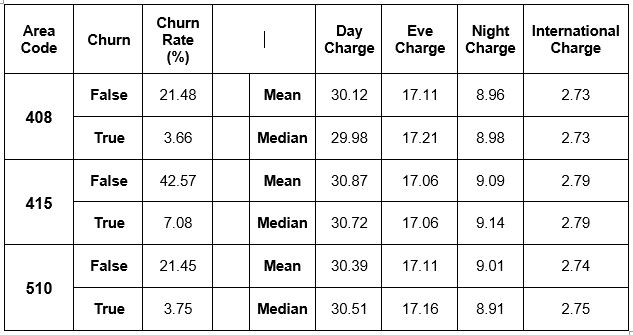

**The above table indicates that area code 415 has a higher proportion of customers; nonetheless, the distribution of churn is nearly the same across all area codes.**

Churn on basis of international plan

We discovered from this that customers who have foreign plans have a higher churn rate—nearly 42.41% of clients cancel.

Churn based on voice mail and international plans

**There are 483 total customer churns.**

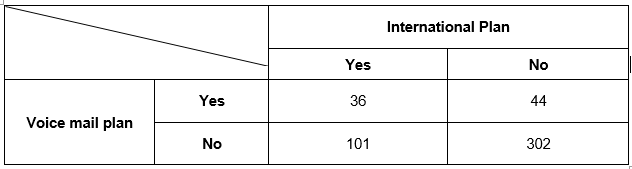

Therefore, based on this table, we may conclude that a substantial percentage of people—roughly 62%—have neither a vmail plan nor an international plan.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1  Dependent Column Value Counts
print(tele_data.Churn.value_counts())
print("\n")

# Dependent Variable Column Visualization
tele_data['Churn'].value_counts().plot( kind='pie', #Specifies that a pie chart should be created.,
                                        figsize=(10,6), #Sets the size of the figure (width, height).
                                        autopct="%1.1f%%",#Displays the percentage labels on each pie wedge with one decimal place.
                                        startangle=50, #Sets the angle at which the pie chart starts.
                                        shadow=True,
                                        labels=['Not Churn(%)','Churn(%)'], #Sets the labels for the two categories.
                                        colors=['green','red'],explode=[0.12,0]) #Specifies the colors for the two categories.
plt.title('Total Percentage of Churn')

# Displaying chart
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are commonly used to depict the proportions of a whole, and they are particularly effective for showing data that has already been computed as a percentage of the entire. They are an excellent means of displaying data quantities or percentages in a straightforward and visually pleasing manner.

##### 2. What is/are the insight(s) found from the chart?

According to the following graphic, there are 2850 customers that have not been churned, accounting for 85.5% of the total customer data in the dataset. In contrast, 483 customers were churned, accounting for 14.5% of the total customer data in the dataset.

Customers are churned at a rate of 14.5%, which may appear to be a little amount, but it was originally 1.45%, which has since increased to 14.5%. As a result, quick action is required.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In a perfect world, the telecom industry's customer turnover rate would be between 15% and 20%. We have a 14.5% churn rate in this, which is not enormous, but losing customers is terrible for company.

It is simple to lose clients but extremely tough to get new ones. One churned client will drive away 3-4 consumers who could be recruited by your teleservice provider using the "POWER OF WORDS."

So, churn rate data is undoubtedly useful for future decisions.


#### Chart - 2

In [ ]:
# Chart - 2 visualization code
for col in tele_data.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.histplot(tele_data[col], ax = axes[0],kde = True)
    sns.boxplot(tele_data[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

##### 1. Why did you pick the specific chart?

Histograms are used to depict the distribution of a single variable. Histograms are bar charts that show the frequency or count of data points within specific ranges. Histograms are very effective for visualizing continuous data like age, height, weight, or income. They let you to observe the distribution's form, including any skewness or outliers, and can assist you in identifying patterns or trends in the data.

Box plots are also useful for comparing the distributions of two or more datasets since they show differences and similarities in the data's spread and central tendency.Box plots, also known as box-and-whisker plots, are a sort of data visualization that is used to represent a dataset's distribution and offer a summary of its major statistical aspects.


##### 2. What is/are the insight(s) found from the chart?

We can observe from the preceding distribution charts that all columns are symmetrically distributed and that the mean is approximately equal to the median for numerical columns. Because there are only three options in this column, Area code will be considered as a categorical variable.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Histograms and Box plots provide us with complete statistical measure information on how the column data is distributed across the dataset.
which can be very much beneficial in Machine learning model training.

#### Chart - 3

In [ ]:
# Chart - 3  State vs. average true churn percentage visualization code

# Vizualizing top 10 churned state
plt.figure(figsize=(10,5))
bar1 = ((tele_data.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = False).reset_index(name="Average True Churn ").head(10))
plots = sns.barplot(data = bar1, x = 'State', y="Average True Churn ")
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
# Setting limit of the y axis from 0 to 30
plt.ylim(0,30)
plt.show()

In [ ]:
# Vizualizing bottom 10 churned state
plt.figure(figsize=(10,5))
bar1 = ((tele_data.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = True).reset_index(name="Average True Churn ").head(10))
plots = sns.barplot(data = bar1, x = 'State', y="Average True Churn ")
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" State with least churn percentage", fontsize = 20)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
# Setting limit of y axis from 0 to 10
plt.ylim(0,10)
plt.show()

##### 1. Why did you pick the specific chart?

The size or frequency of different categories or groupings of data are compared using bar charts. Bar charts are excellent for comparing data across categories and for displaying a vast quantity of data in a compact space.

We utilized a Bar Chart to display the average percentage of genuine churn per state.


##### 2. What is/are the insight(s) found from the chart?

There are 51 states with varying turnover rates.

**CA, NJ, TX, MD, SC, MI, MS, NV, WA, and ME**have greater churn rates of more than 20%, which is more than 50% of the national average.

And the states with the lowest churn rates are **HI, AK, AZ, VA, IA, LA, NE, IL, WI, and RI**.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the data on state-by-state churning shows that several states have an average churn rate of more than 20%, which has to be examined and further analyzed to see which factors are producing the churn.


#### Chart - 4

In [ ]:
# Chart - 4  One Digit Account Length
one_length = tele_data[tele_data['Account length']<=9].loc[:,['Churn']].value_counts()
print(one_length)
print(" ")

# Visualizing One Digit Account Length Based on Churn percentage
#color palette selection
colors = sns.color_palette('pastel')[0:7]
textprops = {'fontsize':13}

plt.figure(figsize=(15,7))
# plotting pie chart
plt.pie(one_length, labels=['Not Churn(%)','Churn(%)'], startangle=90, colors=colors, autopct="%1.1f%%",textprops = textprops)
plt.title('One Digit Account Length churn rate', fontsize=18)
plt.show()

In [ ]:
# Two Digit Account Length
two_account=tele_data[(tele_data['Account length']<=99) & (tele_data['Account length']>=10)].loc[:,['Churn']].value_counts()
print(two_account)
print(" ")

# Visualizing Two Digit Account Length Based on Churn percentage
#color palette selection
colors = sns.color_palette('pastel')[0:7]
textprops = {'fontsize':13}

plt.figure(figsize=(15,7))
# plotting pie chart
plt.pie(two_account, labels=['Not Churn(%)','Churn(%)'], startangle=90, colors=colors, autopct="%1.1f%%", textprops = textprops)
plt.title('Two Digit Account Length churn rate', fontsize=18)
plt.show()

In [ ]:
# Three Digit Account Length
three_account=tele_data[(tele_data['Account length']<=tele_data['Account length'].max()) & (tele_data['Account length']>=100)].loc[:,['Churn']].value_counts()
print(three_account)
print(" ")

# Visualizing Three Digit Account Length Based on Churn percentage
#color palette selection
colors = sns.color_palette('pastel')[0:7]
textprops = {'fontsize':13}

plt.figure(figsize=(15,7))
# plotting data on chart using seaborn
plt.pie(three_account, labels=['Not Churn(%)','Churn(%)'],startangle=90 , colors=colors, autopct="%1.1f%%",textprops = textprops)
plt.title('Three Digit Account Length churn rate', fontsize=18)
plt.show()

In [ ]:
# Box Plot for Account Length attribute
plt.figure(figsize=(10,8))
sns.boxplot(data=tele_data, x='Churn', y='Account length', showmeans = True)
plt.title('Account Length Boxplot with Churn', fontsize=18)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are commonly used to depict the proportions of a whole, and they are particularly effective for showing data that has already been computed as a percentage of the entire.

So, I utilized a Pie chart to get a % comparison of the churn percentage account term wise.

A boxplot is a single plot that summarizes the major statistical properties of a dataset, such as the median, quartiles, and range. Boxplots are useful for detecting outliers in a dataset, comparing the distribution of several datasets, and analyzing data dispersion. They are frequently used in statistics and data visualization.

So, as seen in the box plot graph, I utilized a box plot to obtain the maximum and lowest value with well-segregated outliers and a well-defined mean and median.


##### 2. What is/are the insight(s) found from the chart?

**Account Length**

We can catagories Account Length into three catagories like
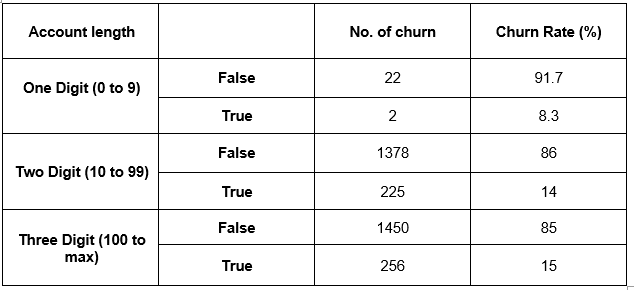

**REMARK**


As from the above record, we can see that Two digit Account Length customers are churning with a number of 225 and Three digit Account Length customers are churning with a number of 256.

So, their churning rate is high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Account duration is the number of days a client is active. So the churn rate for new consumers is too low, roughly 8.3% in percentage and number is 2. They may just be utilizing the telecom service to reap the perks, and they may be dissatisfied with the service offered and churned.

People with account lengths ranging from 10 to 99 had a 14% churn rate. Customers under 50 may be classified as new customers, while those between 55 and 99 may not get advantages from the plan chosen.

People with account lengths of more than 100 are considered elderly clients, and they may be churning owing to the lack of new offerings such as the power plus plan or other incentives.

Yes, Account Length does provide a clear picture of deciding causes and insights.



#### Chart - 5

In [ ]:
# Chart - 5 visualization code---> data for international plan
inter_plan = tele_data['International plan'].value_counts()
print(inter_plan)
print(" ")

# Visualizing Percentage of customers taken international plan
#color palette selection
colors = sns.color_palette('husl')[0:7]
textprops = {'fontsize':13}

plt.figure(figsize=(15,7))
# plotting pie chart
plt.pie(inter_plan, labels=['No','Yes'],startangle=90 , colors=colors, autopct="%1.1f%%", textprops = textprops)
plt.title('International Plan', fontsize=18)
plt.show()


In [ ]:
# Assigning values for furthur charts
i1 = tele_data['International plan'].unique()
i2 = tele_data.groupby('International plan')['Churn'].mean()*100
i3 = tele_data.groupby(['International plan'])['Total intl charge'].mean()
i4 = tele_data.groupby(["Churn"])['Total intl minutes'].mean()

In [ ]:
# Visualizing code for people churning percentage having international plan
plt.figure(figsize=(6,7))
plots = sns.barplot(x=i1,y=i2)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                      size=12, xytext=(0, 8),
                      textcoords='offset points')

plt.title(" Percentage of customer churn on basis of International plan", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
plt.ylim(0,45)
plt.show()

In [ ]:
# Visualizing code for average calling charge of customers having international plan
plt.figure(figsize=(6,7))
plots = sns.barplot(x=i1,y=i3)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" Average charges on the basis of International plan", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel('Charges', fontsize = 15)
plt.ylim(0,3.5)
plt.show()

In [ ]:
# Visualizing code for average minutes talked by customers having international plan
plt.figure(figsize=(6,7))
plots = sns.barplot(x=i1,y=i4)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" Average International minutes on basis of international plan", fontsize = 20)
plt.xlabel('International Plan', fontsize = 15)
plt.ylabel('Minutes', fontsize = 15)
plt.ylim(0,12)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are a great way to display the proportion of a whole, particularly when the data has already been calculated as a percentage. They can be used to show the percentage of people who have taken an international plan, with each color representing a different segment of the chart.

Bar charts are helpful in comparing the size or frequency of different categories or groups of data. They can be used to compare data across various categories and display a large amount of data in a small space. We can use a bar chart to show the percentage of customers with an international plan who have churned, along with their average calling charge and conversation average minutes.

##### 2. What is/are the insight(s) found from the chart?

In this analysis, it was found that out of 3010 people, 323 have an international plan while the remaining 2687 don't. Among those who have an international plan, 42.4% of people left the company (churned), whereas among those who don't have an international plan, only 11.4% of people left the company.

Furthermore, among those who have an international plan, their average charge is 2.87 and they talk for an average of 10.7 minutes. On the other hand, among those who don't have an international plan, their average charge is 2.75 and they talk for an average of 10.16 minutes.

One possible reason why people having an international plan might be leaving is that they are paying the same amount of money for international calls as customers who don't have an international plan. As a result, they aren't receiving any additional benefits for having an international plan, which could be making them unhappy.

3. "Can insights lead to negative growth? Please provide a specific justification."

Yes, the insights obtained can definitely have a positive impact on the business. For instance, customers with an international plan are charged additional fees, but the talk time value is the same as for customers without an international plan. This could be a major reason for the higher rate of churn among customers with an international plan."

#### Chart - 6

In [ ]:
# Chart - 6 visualization code --> data for voice mail plan
voice = tele_data['Voice mail plan'].value_counts()

# vizualizing code for customers percentage having voice mail plan

#color palette selection
palette_color = sns.color_palette('pastel')
textprops = {'fontsize':13}

# plotting chart of voice mail
plt.figure(figsize=(9,7))
plt.pie(voice, labels=['No','Yes'],startangle=90 , colors=palette_color, autopct="%1.1f%%",textprops = textprops)
plt.title('Distribution of customers having voice mail plan', fontsize=18)
plt.show()

In [ ]:
# Vizualizing code for customers churning while having voice mail plan

cc1=list(['no','yes'])
cc2=tele_data.groupby('Voice mail plan')['Churn'].mean()*100

plt.figure(figsize=(6,8))
plots = sns.barplot(x=cc1,y=cc2)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" Percentage of customer churn on basis of voice mail plan", fontsize = 20)
plt.xlabel('Voice mail plan', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are a common way to represent the proportion of a whole. They are particularly helpful when presenting data that has already been calculated as a percentage of the total. In this context, we have used a pie chart to illustrate the percentage of customers who have a voice mail plan.

On the other hand, bar charts are a useful tool to compare the size or frequency of different categories or groups of data. They are especially helpful for comparing data across various categories and displaying a large amount of data in a small space. In this context, we have used a bar chart to demonstrate the percentage of customers who have churned and had a voice mail plan.

##### 2. What is/are the insight(s) found from the chart?

Please note that there are two types of customers in our system: those who have a voice mail plan and those who don't. The customer ID 2411 does not have a voice mail plan, while the customer ID 922 has a voice mail plan.

It is important to note that among customers who don't have a voice mail plan, 16.7% of them tend to leave our service. On the other hand, among customers with a voice mail plan, only 8.7% leave our service.

Therefore, it can be concluded that customers with a voice mail plan tend to churn less frequently than those who don't have a voice mail plan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

"I am considering the voicemail plan partially."

#### Chart - 7

In [ ]:
# Chart - 7 visualization code Visualizing code for Area Code wise average churn percentage
a1= tele_data['Area code'].unique()
b1= tele_data.groupby('Area code')['Churn'].mean()*100

plt.figure(figsize=(6,5))
plots = sns.barplot(x=a1, y=b1)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Area Code vs Churn Percantage',fontsize=20)
plt.xlabel('Area code', fontsize = 15)
plt.ylabel('Churn percentage (%)', fontsize = 15)
plt.ylim(0,17)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are commonly used to compare the size or frequency of different categories or groups of data. They are particularly useful for comparing data across different categories, and can effectively display a large amount of data in a small space. In order to display the average percentage of true churn with respect to Area Code, we have utilized a Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

The churn rate is approximately 14% for all area codes, which indicates that the area code is not a significant factor to consider.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, It has been observed that the area code does not have any impact on the churn rate, as it remains constant at 14% for all area codes. However, if we further classify the area codes by their respective states, we can analyze the states where the issue is occurring. Therefore, it has been suggested that analyzing the states rather than area codes can help to identify the issue and create a business impact.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code Average of total day calls, total day minutes & total day charge of churn
cn_dcalls = pd.DataFrame(tele_data.groupby(["Churn"])['Total day calls'].mean())
print(cn_dcalls)
print('')
cn_dm = pd.DataFrame(tele_data.groupby(["Churn"])['Total day minutes'].mean())
print(cn_dm)
print('')
cn_dc = pd.DataFrame(tele_data.groupby(["Churn"])['Total day charge'].mean())
print(cn_dc)

In [ ]:
# Vizualizing Total day minutes vs total day charge
plt.figure(figsize=(7,8))
sns.scatterplot(data=tele_data, x="Total day minutes", y="Total day charge", hue="Churn")
plt.title('Total Day Minutes, vs Total Day Charge', fontsize=18)
plt.xlabel('Total day minutes',fontsize = 13)
plt.ylabel('Total day charges',fontsize = 13)
plt.show()

In [ ]:
# Average of total eve calls, total eve minutes & total evening charge of churn
cn_ecalls = pd.DataFrame(tele_data.groupby(["Churn"])['Total eve calls'].mean())
print(cn_ecalls)
print(" ")
cn_em = pd.DataFrame(tele_data.groupby(["Churn"])['Total eve minutes'].mean())
print(cn_em)
print(" ")
cn_ec = pd.DataFrame(tele_data.groupby(["Churn"])['Total eve charge'].mean())
print(cn_ec)


In [ ]:
# Vizualizing total evening minutes vs total evening charge
plt.figure(figsize=(7,8))
sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=tele_data)
plt.title('Total evening minutes vs Total evening charge', fontsize=18)
plt.xlabel('Total eve minutes',fontsize = 13)
plt.ylabel('Total eve charges',fontsize = 13)
plt.show()

In [ ]:
# Average of total night calls, total night minutes & total night charge of churn
cn_ncalls = pd.DataFrame(tele_data.groupby(["Churn"])['Total night calls'].mean())
print(cn_ncalls)
print(" ")
cn_nm = pd.DataFrame(tele_data.groupby(["Churn"])['Total night minutes'].mean())
print(cn_nm)
print(" ")
cn_nc = pd.DataFrame(tele_data.groupby(["Churn"])['Total night charge'].mean())
print(cn_nc)

In [ ]:
# Vizualizing Total night minutes vs total night charge
plt.figure(figsize=(7,8))
sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=tele_data)
plt.title('Total night minutes vs Total night charge', fontsize=18)
plt.xlabel('Total night minutes',fontsize = 13)
plt.ylabel('Total night charges',fontsize = 13)
plt.show()

In [ ]:
# Table of average calls of total day, eve & night on basis of churn
cn_calls = pd.merge(pd.merge(cn_dcalls,cn_ecalls, on = 'Churn'),cn_ncalls,on = 'Churn').round(2).T
cn_calls

In [ ]:
# Bar plot of above table
plt.figure(figsize=(9,6))
cn_calls.plot(kind='bar',ylabel='mean')
plt.title('Average of calls on the basis of churn', fontsize=18)
plt.xlabel("calls", fontsize = 13)
plt.ylabel('Average of Calls',fontsize = 13)
plt.show()

In [ ]:
# Table of average minutes of total day, eve & night on basis of churn
cn_minutes = pd.merge(pd.merge(cn_dm,cn_em, on = 'Churn'),cn_nm,on = 'Churn').round(2).T
cn_minutes

In [ ]:
# Bar plot of above table
plt.figure(figsize=(9,6))
cn_minutes.plot(kind='bar',ylabel='mean')
plt.title('Average of minutes on the basis of churn', fontsize=18)
plt.xlabel("minutes", fontsize = 13)
plt.ylabel('Average of minutes',fontsize = 13)
plt.show()

In [ ]:
# Table of average charges of total day, eve & night on basis of churn
cn_charges = pd.merge(pd.merge(cn_dc,cn_ec, on = 'Churn'),cn_nc,on = 'Churn').round(2).T
cn_charges

In [ ]:
# Bar plot of above table
plt.figure(figsize=(9,7))
cn_charges.plot(kind='bar',ylabel='mean')
plt.title('Average of charges on the basis of churn', fontsize=18)
plt.xlabel("Charges", fontsize = 13)
plt.ylabel('Average of charges',fontsize = 13)
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plots are a type of diagram used to display the relationship between two numerical variables. They are quite useful for detecting patterns and trends in data. By visually depicting the relationship between two variables, scatter plots provide a clear picture of how the two variables are related.

In the case of our analysis, we have employed a scatter plot to represent the correlation between evening, day, and night calls, minutes, and charge.

On the other hand, bar charts are a type of graph used to compare different categories or groups of data by displaying their size or frequency. Bar charts are an excellent way to compare data across different categories and can be used to present a large amount of data in a small space.

In our analysis, we have used a bar chart to display the manipulated evening, night, and day data, which has allowed us to depict meaningful insights.

##### 2. What is/are the insight(s) found from the chart?

Churn customers tend to speak for more minutes during the day, evening, and night, resulting in higher charges than non-churn customers. To prevent losing these customers, we can introduce a master plan that offers discounts or additional free minutes to customers who exceed the allotted talk time. This approach will make customers who are at risk of churning happier and more likely to stay with our company.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Telecom service providers offer two essential product plans: calling and messaging. Therefore, optimizing voice call plans can have a positive impact on business. Customers who use only the calling service should be provided with additional offers such as talk time or power plus plans. For those who use voice call plans only during the night, exciting plans can be offered from midnight until 6 a.m. Loyal customers with a higher account length should be provided with exciting offers to retain their loyalty, as the churning of such customers will have a negative impact on the business.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code data for customer service calls
service = pd.DataFrame(tele_data.groupby('Customer service calls')['Churn'].mean()*100)

# Visualizing churn rate per customer service calls
plt.figure(figsize=(8,5))
plots = sns.barplot(x=service.index, y=service['Churn'])
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Churn rate per service call", fontsize = 20)
plt.xlabel('No of cust service call', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are a reliable tool for comparing the size or frequency of different categories or groups of data. They are particularly useful when comparing data across distinct categories, and they can help to effectively display a large amount of data in a small space. In our case, we have used a bar plot to demonstrate the relationship between the churn rate and the number of customer service calls.

##### 2. What is/are the insight(s) found from the chart?

The number of customer service calls can range from 0 to 9. However, customers who make more service calls are likelier to leave the company. This is evident from the graph, which shows that customers who make more than five service calls have a higher churn rate. Therefore, it is crucial to promptly address the queries of customers who make more than five service calls and provide better service to prevent them from leaving the company.

**Customers who contact customer service four times or more are four times more likely to churn than those who contact less than four times.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Providing good customer service is crucial for the success of any business. It has a positive impact on customer satisfaction, loyalty, and retention. To ensure good customer service, it is important to promptly attend to customer calls and resolve their queries as quickly as possible. The resolution duration of customer queries should be optimized to ensure efficiency. If a particular issue is reported by more than five customers, a root cause analysis should be conducted to identify the problem and fix it for everyone. The number of calls made by each customer should be minimized, and their issues should be resolved in a single call. Customer service agents who perform well in resolving customer issues should be recognized or rewarded for their efforts.

#### Chart - 10

In [ ]:
import numpy as np

# Correlation Heatmap visualization code
corr = tele_data.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = False

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 12))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")


##### 1. Why did you pick the specific chart?

The correlation coefficient is a statistical measure that shows how strong and in which direction a linear relationship between two variables exists. A correlation matrix is a useful tool to summarize the relationships among a set of variables and helps in selecting which variables to include in a model. The correlation coefficient ranges from -1 to 1, indicating the strength and direction of the correlation.

**For analyzing the correlation between variables, we used a correlation heatmap to obtain correlation coefficients.**

##### 2. What is/are the insight(s) found from the chart?

Based on the correlation heatmap above, we can observe that the following variables are highly positively correlated: total day charge and total day minute, total evening charge and total evening minute, and total night charge and total night minute. These variables have a correlation value of 1. On the other hand, customer service calls are only positively correlated with area code and negatively correlated with the rest of the variables. The other correlations can be inferred from the chart presented above.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**Here are some solutions to reduce customer churn:**
- Modify the international plan to charge the same as the standard plan.
- Be proactive in communication with customers.
- Ask for feedback regularly.
- Periodically offer incentives to retain customers.
- Look into the customers who face problems in the states with the highest churn rates.
- Focus on retaining the best customers.
- Regularly maintain the servers.
- Solve connectivity issues to improve network performance.
- Define a clear roadmap for new customers.
- Analyze churn when it occurs.
- Stay competitive in the market.

# **Conclusion**

The telecommunications industry is already established, and acquiring new customers is slow. As a result, businesses in this sector aim to retain existing customers and decrease customer churn. This project analyzed a churn dataset to identify the primary factors contributing to churn and gain valuable insights. By conducting exploratory data analysis, we were able to obtain insights into the churn dataset, which are listed below:
- The four charge fields have a direct correlation to the minute fields.
- The area code may be irrelevant and can be excluded.
- Customers who have an International Plan tend to churn more frequently.
- Customers who have made four or more customer service calls tend to churn significantly more than those who haven't.
- Customers with high day and evening minute usage are more likely to churn.
- There is no clear relationship between churn and variables such as day calls, evening calls, night calls, international calls, night minutes, international minutes, account length, or voicemail messages.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***